# Questão 2

In [90]:
import sympy as sp
import numpy as np
from sympy import *
from utils import symdisp, symplot, round_expr


In [91]:
m = [8,1,4] #<<<<<<<< 3 ÚLTIMOS DÍGITOS DA MATRÍCULA
t = sp.symbols('t', real=True)
t0 = 0
# Elementos do circuito
v = 2 ; symdisp('v = ',v,'V')# fonte de tensão 
i = 1 ; symdisp('i = ',i,'A')# fonte de corrente
L = 2 ; symdisp('L = ',L,'H')# Indutância
C = (10**-6); symdisp('C = ',C*(10**6),'μF') # Capacitor
v_C_0 = 5 ; symdisp('v_C(0) = ',v_C_0,'V') #tensão inicial no capacitor
r1 = m[0]+1; symdisp('R1 = ',r1,'Ω') # resistencia 1
r2 = m[1]+1; symdisp('R2 = ',r2,'Ω') # resistencia 2
r3 = m[2]+1; symdisp('R3 = ',r3,'Ω') # resistencia 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# a)

Fonte de corrente após conversão da fonte de tensão:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

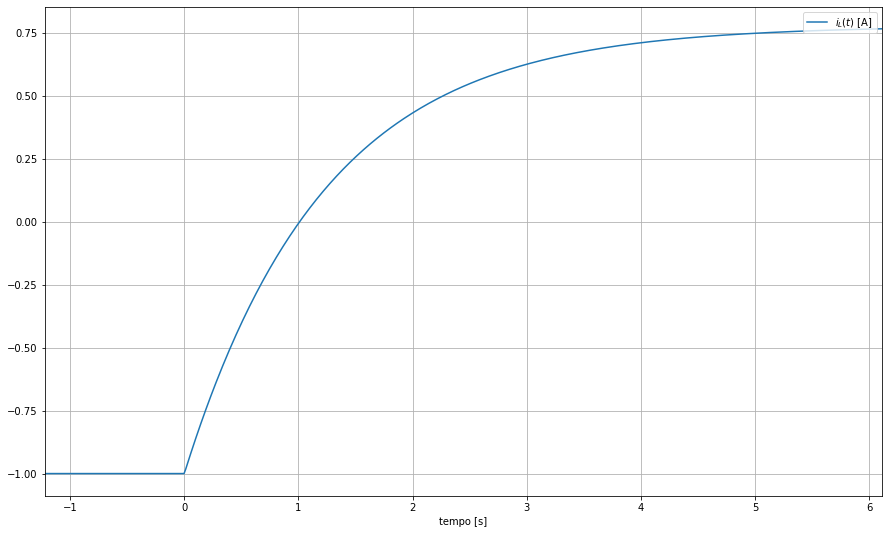

In [92]:
# Letra A - Determinar i_L para 0<= t <= 1s :

# Entre 0<=t<=1, o indutor está em curto circuito, logo para o circuito equivalente a resistencia 2 será anulada;
# Em seguida farei transformação de fonte para obter aa fonte de correntes em paralelos e em seguida uma só fonte de corrente:
print('Fonte de corrente após conversão da fonte de tensão:')
i2 = v/r1; symdisp('i_{eq}=',round(i2,3),'A')

# Fontes de correntes em paralelos soma-se as duas:
i3 = -i2+i
i_L_0 = -i ; symdisp('i_L(0^{-})=',i_L_0,'A')

# Agora para obtenção da constante de tempo devemos fazer o Rth
Rth = (r1*r2)/(r1+r2); symdisp('R_{Th} = ',round(Rth,3),'Ω')
v2 = i3*Rth
Ao = i_L_0 - i3
τ = L/Rth; symdisp('τ = ',round(τ,3),'s')

# Com todos os valores "em mãos" podemos definir o valor de i_L(t)
i_L_t = (v2/Rth) + Ao*sp.exp(-t/τ);

i_L_t_plot = sp.Piecewise((-i,t<0),(i_L_t, t>= 0))
symdisp('Resposta:i_L(t) =', round_expr(i_L_t_plot,3), 'A')

intervalo  = np.linspace(t0-τ, t0+5*τ, 500)
symplot(t, i_L_t_plot, intervalo, funLabel = '$i_L(t)$ [A]') 



# Letra B

In [93]:
# calculando α e ω0
α  = 1/(2*Rth*C)       # Frequência de Neper do circuito RLC em paralelo
ω0 = 1/np.sqrt(L*C)  # Frequência de ressonância do circuito RLC

symdisp('α =', round(α,3), ' \\frac{rad}{s}')
symdisp('ω_0 =', round(ω0, 3), ' \\frac{rad}{s}')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Define os valores iniciais da tensão no capacitor e Corrente no Indutor, e o valor final da corrente no indutor.

In [94]:
# informações obtidas pela análise do circuito

t0 = 0 # instante do chaveamento

iL_inf =-777*(10**-3)  # valor final da corrente no indutor
iL_t0 = -777*(10**-3)   # valor inicial da corrente no indutor
vc_t0 = v_C_0  # valor inicial da tensão no capcitor


Calcula as raízes da equação característica S1 e S2

In [95]:
# raízes da equação característica
s1 = -α + np.sqrt(α**2-ω0**2)
s2 = -α - np.sqrt(α**2-ω0**2)

print('Raízes da equação característica:')
symdisp('s_1 =', round(s1, 2), ' rad/s')
symdisp('s_2 =', round(s2, 2), ' rad/s')

# define variáveis da solução geral
t, A1, A2 = sp.symbols('t, A1, A2')

# expressão geral da resposta superamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

print('Forma geral da solução:')
symdisp('i_L(t) = ', round_expr(iL,3), 'A')


Raízes da equação característica:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Forma geral da solução:


<IPython.core.display.Math object>

Resolve o sistema de equações para determinar as constantes $A_1$ e $A_2$

In [96]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   A1 +    A2 + iL_inf, iL_t0)             
eq2 = sp.Eq(s1*A1 + s2*A2,        vc_t0/L)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
A1 = np.array([sol[A1] for sol in soluc])
A2 = np.array([sol[A2] for sol in soluc])

A1 = A1[0]
A2 = A2[0]

print('Solução do sistema:')
symdisp('A_1 =', round(A1,6), ' A')
symdisp('A_2 =', round(A2,6), ' A')


Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Expressão Final e Gráfico da corrente no Indutor:

<IPython.core.display.Math object>

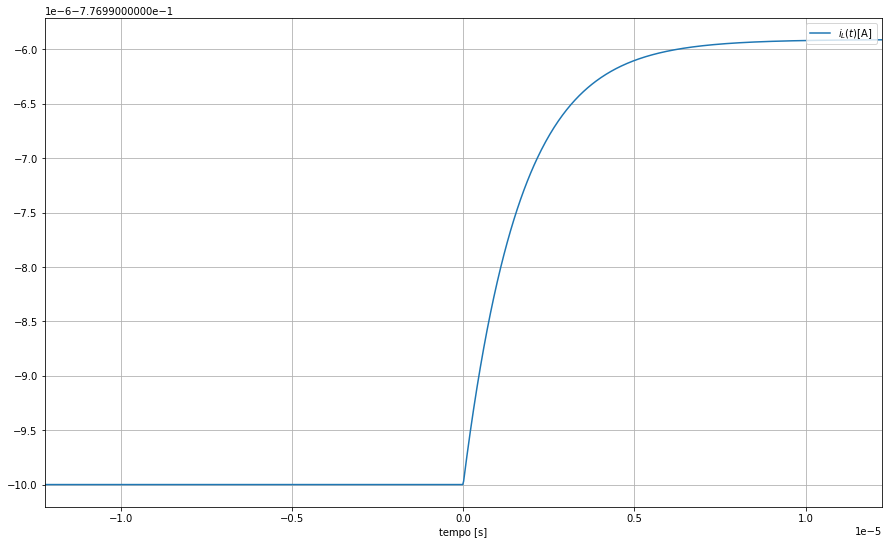

In [97]:
# expressão geral da resposta subamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

iL_plot = sp.Piecewise((iL_t0,t<0),(iL,t>=0))
symdisp('i_L(t) = ', round_expr(iL_plot,6), 'A')

intervalo = np.linspace(t0-τ*10**-5,t0+(τ*10**-5),1000)
symplot(t,iL_plot, intervalo, funLabel ='$i_L(t)$[A]')


Tensão no Capacitor apartir do valor da corrente no Indutor:

<IPython.core.display.Math object>

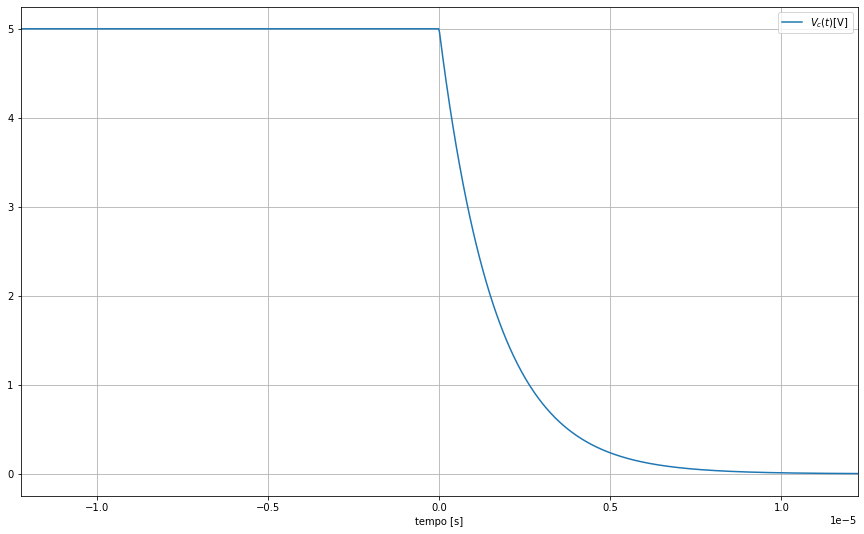

In [98]:
vL = L*sp.diff(iL,t)
vc = vL

vc_plot = sp.Piecewise((vc_t0,t<0),(vc,t>=0))
symdisp('v_C(t) = ', round_expr(vc_plot,3), 'V')

intervalo = np.linspace(t0-τ*10**-5,t0+τ*10**-5,1000)
symplot(t,vc_plot, intervalo, funLabel = '$V_c(t)$[V]')


# c)

In [99]:
# wc = 0.5*C*vc**2
wc = sp.limit(0.5*C*vc**2,t,oo); symdisp('lim_{t->oo} W_C(t) = ',wc,'J')
# wL = 0.5*L*iL**2
wL = 0.5*L*iL_inf**2; symdisp('W_L(oo) = ',round(wL*10**3,2),'mJ')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# d)

PARTE 1: *iL(t) para 0 <= t <= 1s*

In [100]:
# calculando α e ω0
α  = 1/(2*r2*C)       # Frequência de Neper do circuito RLC em paralelo
ω0 = 1/np.sqrt(L*C)  # Frequência de ressonância do circuito RLC

symdisp('α =', round(α,3), ' \\frac{rad}{s}')
symdisp('ω_0 =', round(ω0, 3), ' \\frac{rad}{s}')

# raízes da equação característica
s1 = -α + np.sqrt(α**2-ω0**2)
s2 = -α - np.sqrt(α**2-ω0**2)

print('Raízes da equação característica:')
symdisp('s_1 =', round(s1, 3), ' rad/s')
symdisp('s_2 =', round(s2, 3), ' rad/s')

# define variáveis da solução geral
t, A1, A2 = sp.symbols('t, A1, A2')
iL_t0 = -1
iL_inf = -1
# expressão geral da resposta superamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

print('Forma geral da solução:')
symdisp('i_L(t) = ', round_expr(iL,3), 'A')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Raízes da equação característica:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Forma geral da solução:


<IPython.core.display.Math object>

In [101]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   A1 +    A2 + iL_inf, iL_t0)             
eq2 = sp.Eq(s1*A1 + s2*A2,        vc_t0/L)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
A1 = np.array([sol[A1] for sol in soluc])
A2 = np.array([sol[A2] for sol in soluc])

A1 = A1[0]
A2 = A2[0]

print('Solução do sistema:')
symdisp('A_1 =', round(A1,6), ' A')
symdisp('A_2 =', round(A2,6), ' A')


Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<lambdifygenerated-34>:2: RuntimeWarning: overflow encountered in exp
  return select([less(t, 0),less_equal(t, 1)], [-1,-1 - 5.00002000012e-6*exp(-499998.999998*t) + 5.00002000012e-6*exp(-1.00000200001523*t)], default=nan)


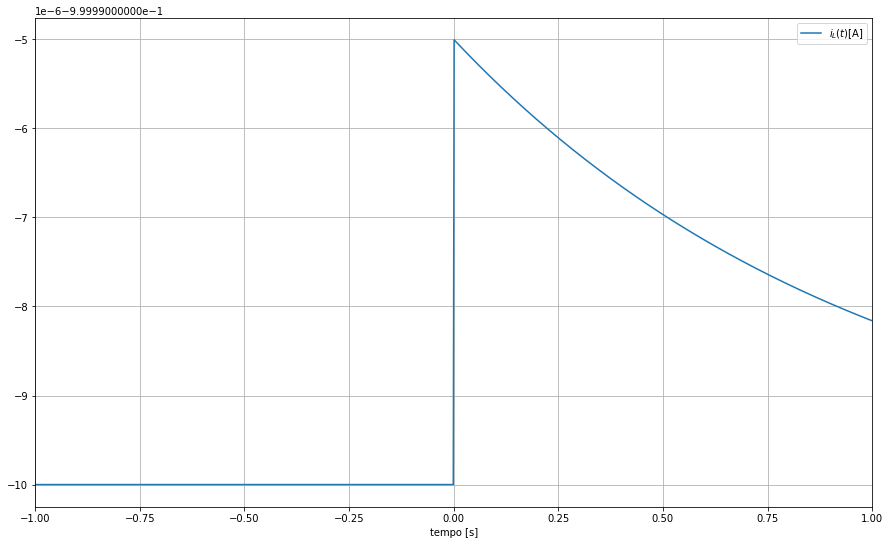

In [102]:
# expressão geral da resposta subamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

iL_plot = sp.Piecewise((iL_t0,t<0),(iL,t<=1))
symdisp('i_L(t) = ', round_expr(iL_plot,6), 'A')

intervalo = np.linspace(-1+t0-τ*10**-5,t0+(τ*10**-4)+1,1000)
symplot(t,iL_plot, intervalo, funLabel ='$i_L(t)$[A]')


Por um instante cheguei a pensar que estivesse errado ppor conta do comportamento do gráfico, pois aparentemente a corrente está variando repentinamente no indutor, coisa que não é posível. Porém com a resolução do gráfico ajustada, vemos o comportamento que se espera da corrente no indutor:

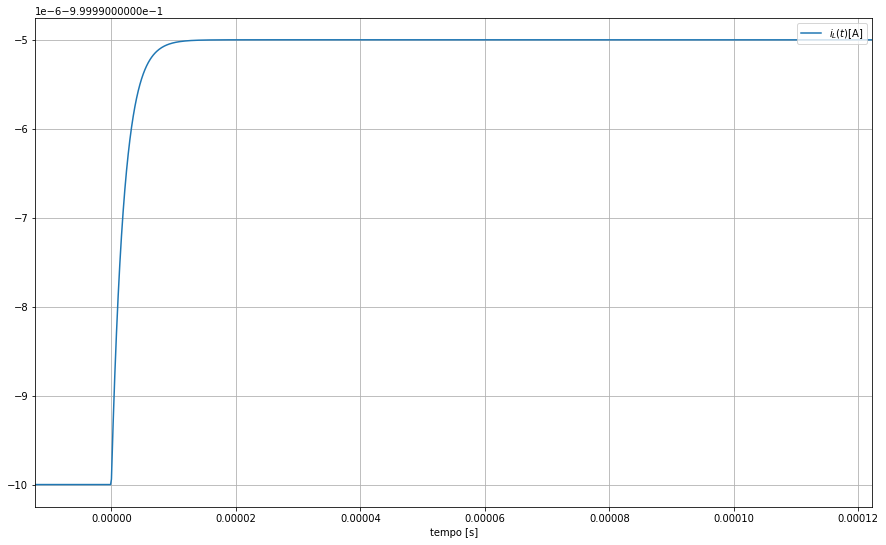

In [103]:
intervalo = np.linspace(t0-τ*10**-5,t0+(τ*10**-4),1000)
symplot(t,iL_plot, intervalo, funLabel ='$i_L(t)$[A]')


PARTE 2: *iL(t) para t >= 1s*

In [104]:
# calculando α e ω0
α  = 1/(2*Rth*C)       # Frequência de Neper do circuito RLC em paralelo
ω0 = 1/np.sqrt(L*C)  # Frequência de ressonância do circuito RLC

symdisp('α =', round(α,3), ' \\frac{rad}{s}')
symdisp('ω_0 =', round(ω0, 3), ' \\frac{rad}{s}')

# raízes da equação característica
s1 = -α + np.sqrt(α**2-ω0**2)
s2 = -α - np.sqrt(α**2-ω0**2)

print('Raízes da equação característica:')
symdisp('s_1 =', round(s1, 3), ' \\frac{rad}{s}')
symdisp('s_2 =', round(s2, 3), ' \\frac{rad}{s}')

# define variáveis da solução geral
t, A1, A2 = sp.symbols('t, A1, A2')
iL_t0 = -1
iL_inf = -777*10**-3
# expressão geral da resposta superamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

print('Forma geral da solução:')
symdisp('i_L(t) = ', round_expr(iL,3), 'A')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Raízes da equação característica:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Forma geral da solução:


<IPython.core.display.Math object>

In [105]:
# define os sistema de equações com as condições iniciais
eq1 = sp.Eq(   A1 +    A2 + iL_inf, iL_t0)             
eq2 = sp.Eq(s1*A1 + s2*A2,        vc_t0/L)  

print('Sistema de equações:')
symdisp('(I): ', round_expr(eq1, 2),' ')
symdisp('(II): ', round_expr(eq2, 2),' ')

# resolve o sistema
soluc = sp.solve((eq1, eq2), dict=True)
A1 = np.array([sol[A1] for sol in soluc])
A2 = np.array([sol[A2] for sol in soluc])

A1 = A1[0]
A2 = A2[0]

print('Solução do sistema:')
symdisp('A_1 =', round(A1,6), ' A')
symdisp('A_2 =', round(A2,6), ' A')


Sistema de equações:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

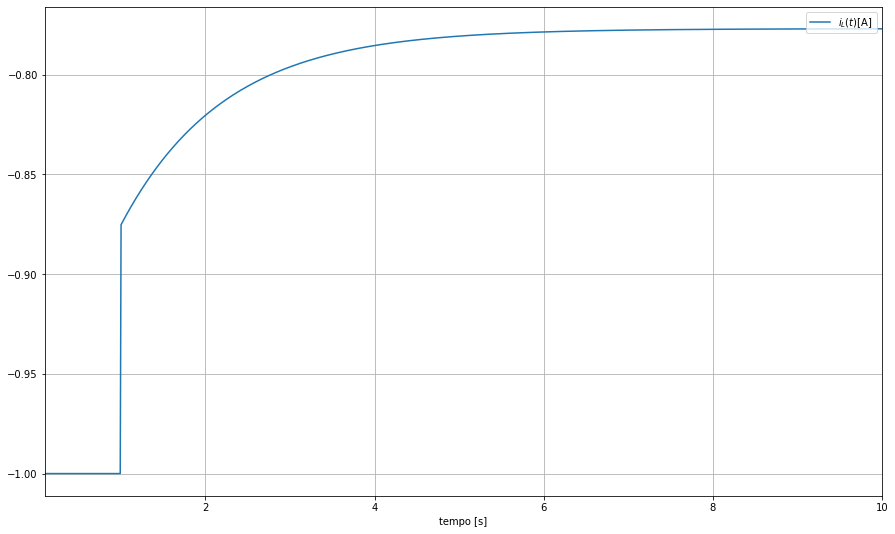

In [106]:
# expressão geral da resposta subamortecida
iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0)) + iL_inf

iL_plot = sp.Piecewise((iL_t0,t<1),(iL,t>=1))
symdisp('i_L(t) = ', round_expr(iL_plot,6), 'A')

intervalo = np.linspace(0.1,t0+10,1000)
symplot(t,iL_plot, intervalo, funLabel ='$i_L(t)$[A]')
